### Low-Level Arrays

There are `3` types of sequence classes:

- `str`: Sequence of characters in quotes (e.g. `"test" = array(["t", "e", "s", "t"], "b")` from [array](https://docs.python.org/3/library/array.html) class)
- `tuple`: Immutable list.
- `list`: Mutable list.

#### Understanding `str` (e.g. `"HELLO"` string)

For example,

| Lower-Level Reference | Higher-Level Reference |
| -- | -- |
| 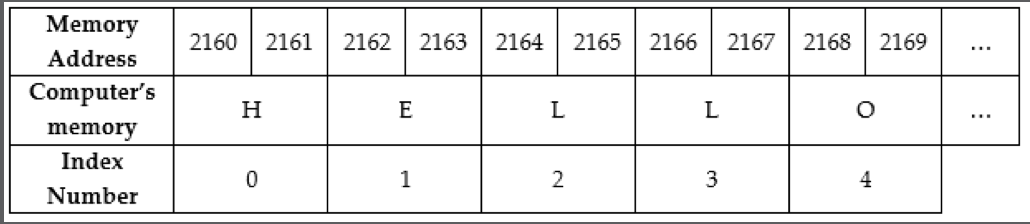 | 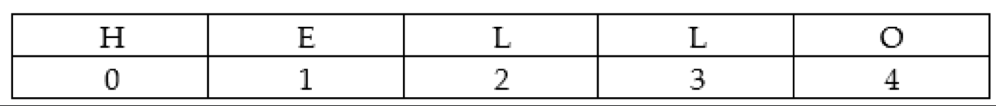 |

In a computer system, each byte of memory is associated with a unique memory address (typically coordinated with the physical layout of the memory system). In this way, any byte of memory can be accessed by using its unique memory address in constant time. Thus making the complexity of storing or retrieving a byte of memory is $O(1)$.

String comprises characters in sequence and most computer systems use Unicode to represent a character (e.g. Python uses `16`-bits to represent a unicode character). Each cell (as shown above) must use the same number of bytes for each character. 

#### Understanding referential arrays and alias arrays (e.g. `tuple` or `str`)

| Referential Array Example | Alias Array Example |
| -- | -- |
| 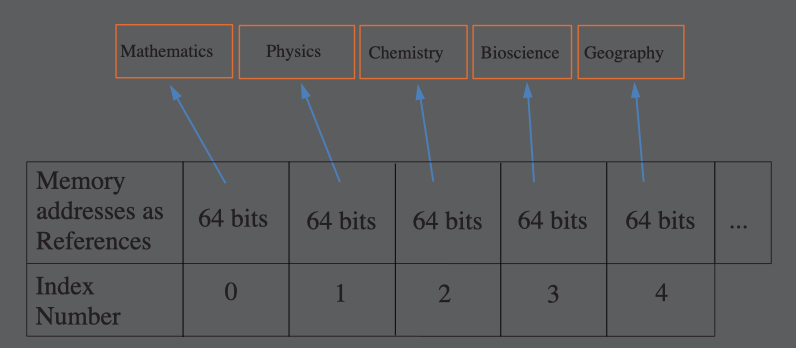 | 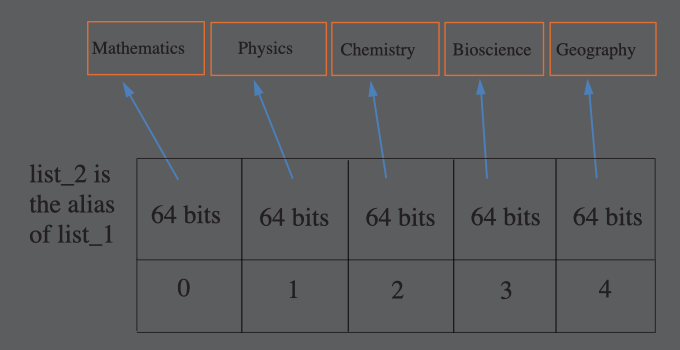 |

Compared to `str` were each cell must use the same number of bytes for each character, in a `list`, the items can be string which usually have different lengths. Each cell uses the same number of bytes and cell-sie shall be deided by the length of the longest string which may lead to memory wastage.

Thus, python uses memory addresses as references and stores the references in an array called referential array. The cell-size to store the memory address of each element is fixed. In this example above, the memory cell-size is `64`-bits (despite the length of each string being different). With fixed cell-size, a constant operation time can be achieved when accessing the memory address based on the index number, and subsequently accessing the string based on the memory address. In this way, the time complexity of accessing elements in the list is $O(1)$.

_**What about alias?**_ In this case, `list_2` is an alias of `list_1`, which means no new list has been created and both reference to the same memory. If one element in `list_2` is changed, the corresponding element in `list_1` will also be changed accordingly.

In [12]:
list_1 = ["Mathematics", "Physics", "Chemistry", "Bioscience", "Geography"]
list_2 = list_1

### Types of Copy

_**Shallow copy**_

|||
| -- | -- |
| 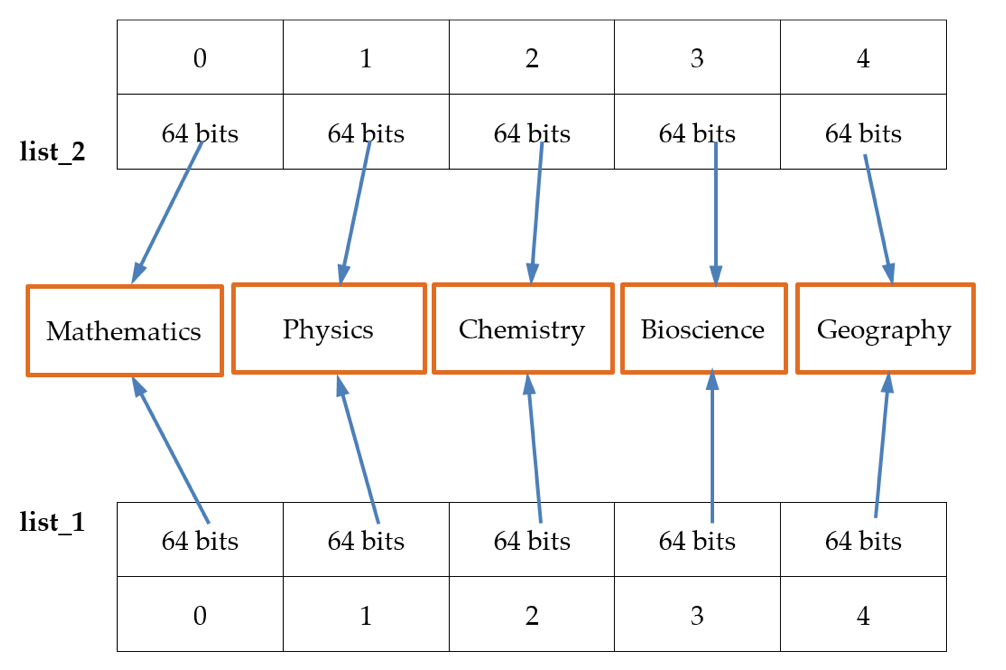 | 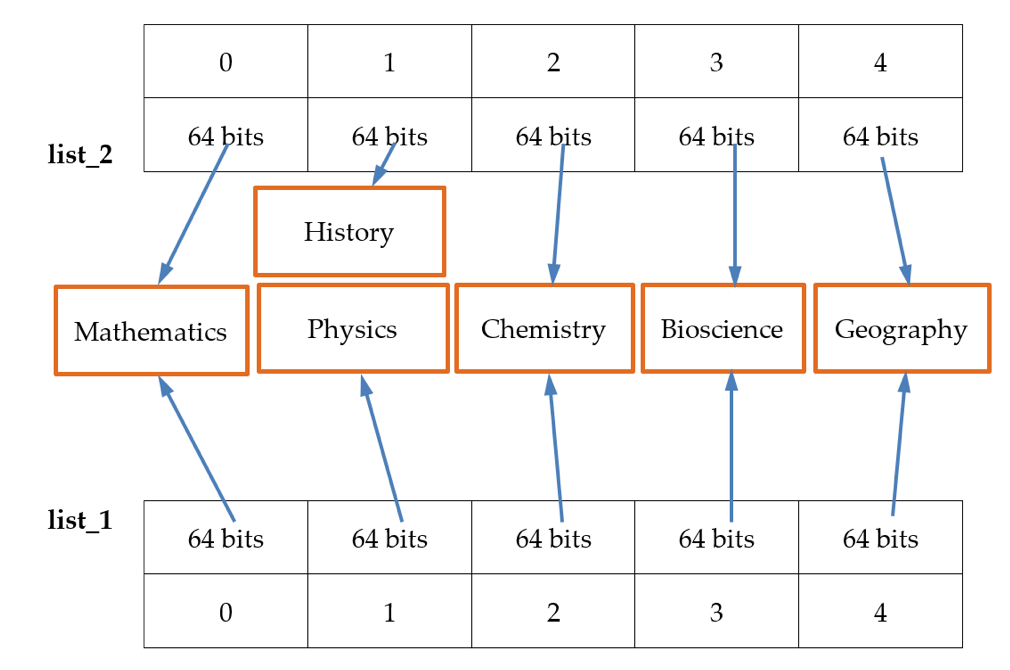 |

New list named `list_2` is created by making a shallow copy. Both `list_1` and `list_2` store the same memory addresses as references to the strings. After the shallow copy, if one element in `list_2` is changed, the corresponding element in `list_1` will not be changed.

_**However**, if the memory addresses to another array, modifying a reference to a list would result in a change._

In [9]:
list_1 = ["Mathematics", "Physics", "Chemistry", "Bioscience", "Geography"]
list_2 = list(list_1)
print("Before")
print("List 1: ", list_1, "\nList 2:", list_2)

list_2[1] = "History"
print("After")
print("List 1: ", list_1, "\nList 2:", list_2)

print("-" * 5)

list_1 = [["Mathematics"], ["Physics"], ["Chemistry"], ["Bioscience"], ["Geography"]]
list_2 = list(list_1)

print("Before")
print("List 1: ", list_1, "\nList 2:", list_2)

list_2[1].append("History")

print("After")
print("List 1: ", list_1, "\nList 2:", list_2) # Notice you need deep copy

Before
List 1:  ['Mathematics', 'Physics', 'Chemistry', 'Bioscience', 'Geography'] 
List 2: ['Mathematics', 'Physics', 'Chemistry', 'Bioscience', 'Geography']
After
List 1:  ['Mathematics', 'Physics', 'Chemistry', 'Bioscience', 'Geography'] 
List 2: ['Mathematics', 'History', 'Chemistry', 'Bioscience', 'Geography']
-----
Before
List 1:  [['Mathematics'], ['Physics'], ['Chemistry'], ['Bioscience'], ['Geography']] 
List 2: [['Mathematics'], ['Physics'], ['Chemistry'], ['Bioscience'], ['Geography']]
After
List 1:  [['Mathematics'], ['Physics', 'History'], ['Chemistry'], ['Bioscience'], ['Geography']] 
List 2: [['Mathematics'], ['Physics', 'History'], ['Chemistry'], ['Bioscience'], ['Geography']]


_**Deep copy**_

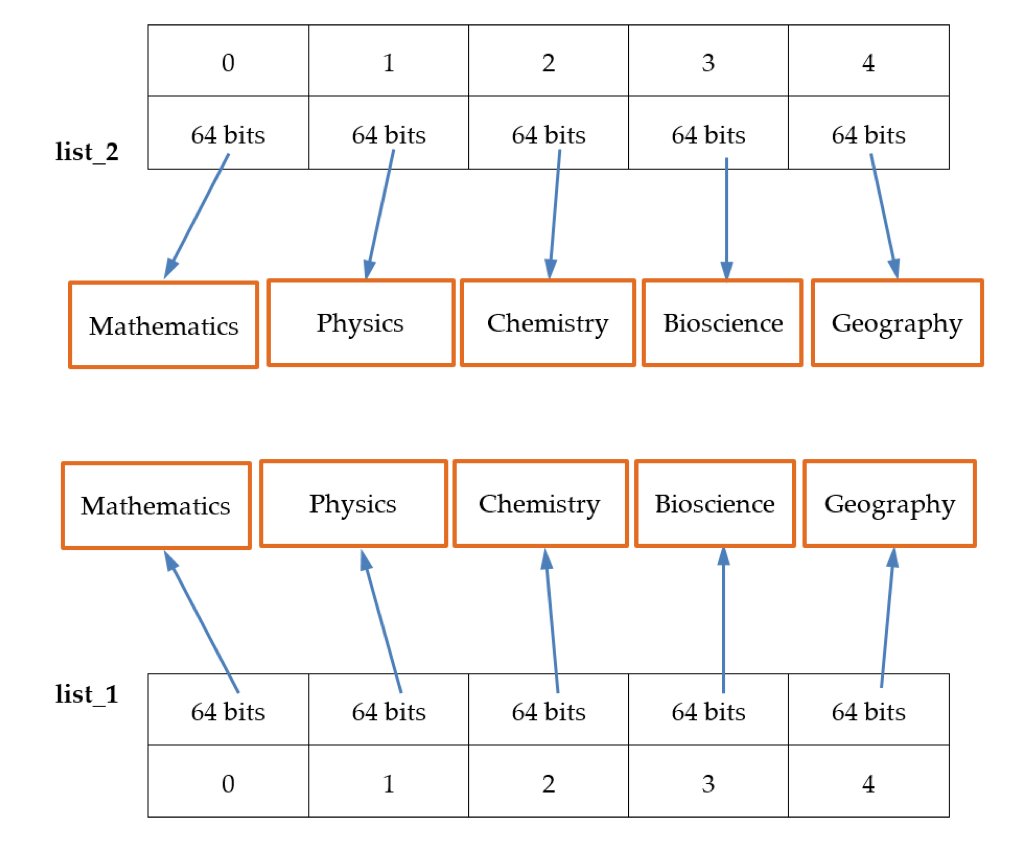

A new list named `list_2` is created by making a deep copy. Moreover, `list_1` and `list_2` store different memory addresses as references to the elements. In the context of `list_1` and `list_2`, if we apply deep copy, it may not always allocate different memory addresses to string elements because string is an immutable data type (e.g. we cannot change a string in-place). Therefore, two lists may link to the same string even if deep copy is applied


_Note that a two-dimensional array is often called a matrix. It's a `list` of $n$ size containing `list` of $m$ size ($n \times m$ size)._

In [11]:
import copy

list_1 = [["Mathematics"], ["Physics"], ["Chemistry"], ["Bioscience"], ["Geography"]]
list_2 = copy.deepcopy(list_1)

print("Before")
print("List 1: ", list_1, "\nList 2:", list_2)

list_2[1].append("History")

print("After")
print("List 1: ", list_1, "\nList 2:", list_2)

Before
List 1:  [['Mathematics'], ['Physics'], ['Chemistry'], ['Bioscience'], ['Geography']] 
List 2: [['Mathematics'], ['Physics'], ['Chemistry'], ['Bioscience'], ['Geography']]
After
List 1:  [['Mathematics'], ['Physics'], ['Chemistry'], ['Bioscience'], ['Geography']] 
List 2: [['Mathematics'], ['Physics', 'History'], ['Chemistry'], ['Bioscience'], ['Geography']]


### Compact array

In Python, an `array` module defines a class to provide the compact storage of data (e.g. `array("i", [1, 3, 5, 7, 9])` uses the type code of `"i"` to indicate signed integers will be stored in an array named number - it is used to determine how many bytes are needed for each element in the array. Most commonly adopted type codes and their memory requirement are listed in the documentation of the [array module](https://docs.python.org/3/library/array.html) is used to create an underlying C array in Python.

#### Differences against referential array

Compact array requires the smallest amount of computer memory _(hence it is called compact)_, because it directly stores the bits of primary data, and are fixed to the allocated memory addresses. 

Alias requires a relatively larger amount of computer memory than compact array, because it additionally stores the memory addresses of each element, which may be `4`-`5` times larger than the size of the original data. 

1. Alias has small flexibility because any change made to one list is autonomously being applied to the other list.
2. Shallow copy requires a relatively larger amount of computer memory than alias due to the creation of a new list, and it stores the same memory addresses to reference the same data. 
3. Deep copy requires the largest amount of computer memory because a totally new list may be created, which may double the requirement of computer memory. With the creation of the totally new list, changes made to one list may not affect the other list at all. 

Regarding flexibility, deep copy has the highest flexibility.

### Dynamic arrays

Precise size of a low-level array must be declared properly so that the system can allocate consecutive memory cells to store the data.

However, although Python `list` has a specific length upon creation, its length may be updated by appending elements to the list. Such an array is an dynamic array with variable length is needed in such scenarios.

Python uses dynamic arrays for `list` objects. The underlying dynamic array of a list is often longer than the list.

For example, given a list of `5` elements, Python may allocate a dynamic array of length `8` to it. In this way, it is easy to add elements to the list until the list comprises `8` elements. If one more element is added, the list class constructs a new array but with more memory capacity. Once there is no room to add in new elements in a list, the size of the underlying array will be doubled, and the elements in the original array are copied to the newly constructed array. 

The copy operations on $n$ elements is $O(n)$, which takes place when the size of an array doubles.

The append operation without coping is $O(1)$

To investigate the time efficiency of appending an element to a dynamic array, _**amortized analysis**_ is normally applied.

#### Amortised analysis

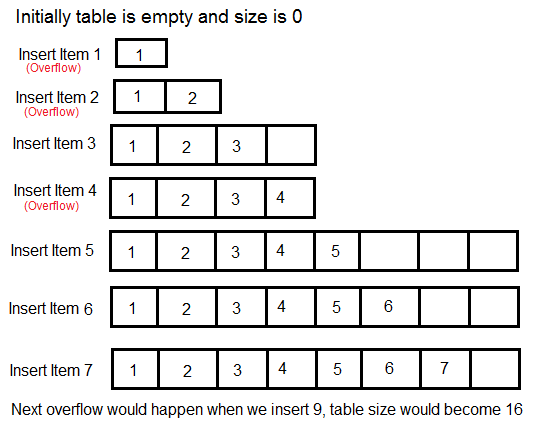

> _**Amortized analysis**_ is a method for analyzing a given algorithm's complexity, or how much of a resource, especially time or memory, it takes to execute.

Suppose we start with dyanmic array with of capacity `1` and then append $n$ elements to the array. 

- First doubling costs `1` because `1` element is copied. 
- Second doubling costs `2`.
- Third doubling costs `4`. 

Hence, $n$ appends cost approximately $1 + 2 + ... + n$ for doubling. Assume $n = 2^k$, then $1 + 2 + ... + n = 1 + 2 + .. + 2^k = 2 \times 2^k - 1 = 2n$. 

Adding the doubling cost of $2n - 1$ to the appending cost of $n$, the total cost is obtained as $3n - 1$. Therefore, the time complexity of $n$ append operations is $O(n$). On average, the amortised time complexity of each append operation on a dynamic array is $O(1)$.

In [14]:
from array import *

n = array ('i', [9, 15, 21, 30, 60, 90])

for i in n:
    print(i)

print('Display the particular elem ')
print('Element 1 is', n[1])

9
15
21
30
60
90
Display the particular elem 
Element 1 is 15


In [20]:
n = array('i', [9, 15, 21, 30, 60, 90])

print('The original array is:')

for i in list(n):
    print(i)
    n.append(i * 100)

print('The new array is:')

for i in n:
    print(i)
    
n.append("t")

The original array is:
9
15
21
30
60
90
The new array is:
9
15
21
30
60
90
900
1500
2100
3000
6000
9000


TypeError: an integer is required (got type str)

Denoting Referential Array (RA) and Compact Array (CA),

| | CA | RA (Alias) | RA (Shallow Copy) | RA (Deep Copy) |
| -- | -- | -- | -- | -- |
| Time complexity (accessing) | $O(1)$ | $O(1)$ | $O(1)$ | $O(1)$ |
| Computer memory usage | Smallest | Bigger than CA | Bigger than Alias | Largest |
| Flexibility | None | Small | Medium | High |

Given an array with consecutive memory addresses, where the size of each element is $S$ and the starting memory address is $n$, what is the memory address for the $i$-th element, where $i$ starts from `0`?

Answer: $n+S\times i$. Each element occupies $S$, starting from $n$, hence, the memory address for $i$th element is $n+S \times i$.

What is the result of the following Python code?

```
a = [[1],[2],[3],[4]]
b = list(a)
a[0] = [0]
print(b)
```

Answer: `[[1],[2],[3],[4]]`

Lists `a` and `b` reference to different lists (this is referential shallow copy). Hence, changing the reference of an element in `a` will not affect `b`.

What is the result of the following Python code?

```
a = [1,2,3,4]
b = a
a[0] = 0
print(b)
```

Answer: `[0,2,3,4]`

List `a` and `b` reference to the same `list` in memory. Hence, updating `a` will affect `b` (alias).

What is the result of the following Python code?

```
a = [[1],[2],[3],[4]]
b = list(a)
a[0][0] = 0
print(b)
```

Answer: `[[0],[2],[3],[4]]`

The elements in both `a` and `b` reference to the same objects. For example, both `a[0]` and `b[0]` refer to the same `[1]`. The line `a[0][0] = 0` updates `[1]` to `[0]` instead of re-referencing `[1]` to `[0]`. Hence, `b[0]` is updated to `[0]` as well.

Given an existing list of length `1`, what is the approximate total number of append and copy operations if we append `5` elements to the list?

Answer: `12`

Appending `5` elements involve `5` append operations. In addition, it involves `1+2+4` copy operations occur at the respective size doubling (see amortised analysis diagram).

#### Array time complexity

| Operation | Array | Dynamic Array |
| -- | -- | -- |
| Accessing | $O(1)$ | $O(1)$ |
| Searching | $O(n)$ | $O(n)$ |
| Inserting | - | $O(n)$ |
| Deleting | - | $O(n)$ |

#### Collections time complexity

| Operation | `list` | `dict` | `set` |
| -- | -- | -- | -- |
| Add/Append | `myList.append(val)` - $O(1)$ | `myDict[key] = val` - $O(1)$ | `mySet.add(val)` - $O(1)$ | 
| Accessing at index/key | `myList[i]` - $O(1)$ | `myDict[key]` - $O(1)$ | -  | 
| `if val in <>` operation | $O(n)$ | $O(1)$ | $O(1)$  | 
| `for val in <>` operation | $O(n)$ | $O(n)$ | $O(n)$  |
| `sort(<>)` operation | $O(n\text{log}(n))$ | - | - |